# 1. 구글 드라이브 연동 및 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# kaggle 사이트에서  다운을 받은후 구글드라이브에 저장하고 불러오는 방식
train = pd.read_csv('/content/Mydrive/MyDrive/datascience/train.csv')
test = pd.read_csv('/content/Mydrive/MyDrive/datascience/test.csv')

# seaborn에서 데이터 셋 불러오는 방식
# titanic = sns.load_dataset('titanic')

# 2. 데이터 확인하기 

## 1) 데이터 형태 확인

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# pclass를 보면 3등급인 승객이 가장 많다고 생각해 볼 수 있다.
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# Age 와 Cabin 그리고 Embarked 이렇게 세개의 데이터에 nan값이 있다는 것을 알 수 있따.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 2) 전처리 이전 데이터 셋의 시각화

#### a. 성별에 따른 생존 비교

* 여성이 남성보다 생존을 하기에 유리했다.


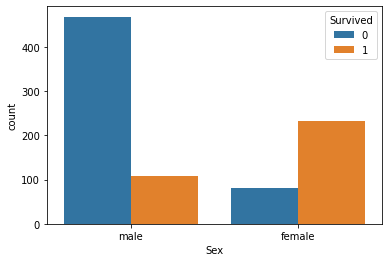

In [ ]:
pre_sex = sns.countplot(data= train, x = 'Sex', hue = 'Survived')
pre_sex

#### b. 티켓 등급에 따른 생존 비교

* 1등급이 가장 많이 생존했으며 가장 적은 승객이 죽었다

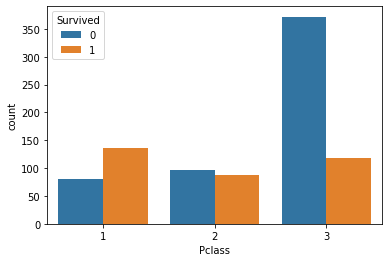

In [ ]:
pre_pclass = sns.countplot(data = train, x = 'Pclass', hue = 'Survived')
pre_pclass

#### c. 나이에 따른 생존 비교

* 나이는 추가적인 전처리가 필요할것 같다. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]), <a list of 88 Text major ticklabel objects>)

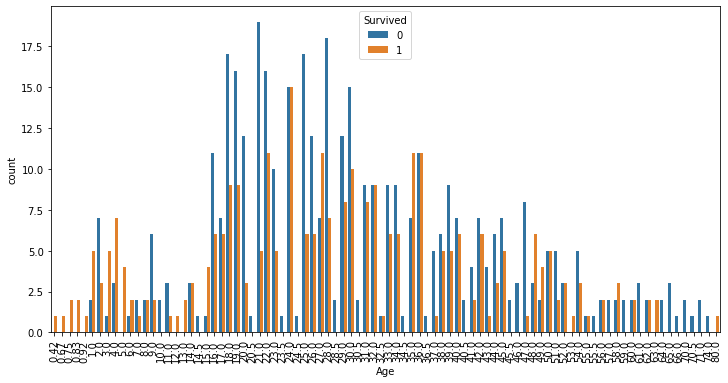

In [ ]:
plt.figure(figsize = (12, 6))
pre_age = sns.countplot(data = train, x = 'Age', hue = 'Survived')
pre_age
plt.xticks(rotation = 90)

# 3. 데이터 전처리 

## Data Cleaning(데이터 정제)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### a. Age의 nan값 처리.

 `평균 + 표준편차값을 Age의 nan값에 채워 주기로 했다.`
 
 `why?. 평균의 데이터를 넣기에는 평균 데이터가 
 급격하게 증가하기 때문에 0이나 평균이 아닌 평균+표준편차를 사용 `

In [ ]:
# 평균 + 표준편차값을 Age의 nan값에 채워 주기로 했다.
# why?. 평균의 데이터를 넣기에는 평균치의 데이터가 
# 급격하게 증가하기 때문에 0이나 평균이 아닌 평균+표준편차를 사용 
age_size = train['Age'].isna().sum()
age_mean = train['Age'].mean()
age_std = train['Age'].std()

np.random.seed(26)
fill_age = abs(np.random.randn(age_size)) * age_std + age_mean
fill_age

array([32.54621251, 57.89848304, 40.06792051, 39.31781096, 33.02368264,
       33.6467053 , 30.12138768, 55.25968247, 41.23723196, 38.74364171,
       32.01377409, 48.7913443 , 43.59017575, 41.26352754, 43.13922641,
       44.69013159, 38.18745068, 69.58779375, 36.92778185, 60.03205587,
       30.69890534, 33.67411562, 43.78886034, 44.85793521, 50.88394374,
       38.16271723, 38.98946901, 32.80174725, 34.07958391, 41.46937955,
       44.70966284, 46.49881349, 39.00323167, 35.25321083, 57.64550967,
       51.18498306, 46.15191233, 32.50383598, 33.56792943, 40.41070255,
       33.92674942, 35.70535862, 35.29944286, 33.3798157 , 38.17155325,
       40.21598593, 30.46128244, 49.52618009, 30.37534986, 41.87813481,
       33.94707731, 34.85996079, 33.75720744, 41.67859335, 30.23251118,
       38.84372406, 31.26138283, 60.38479416, 32.61498256, 30.52829239,
       43.48051063, 46.1347935 , 32.74303121, 62.26438839, 52.30087717,
       38.47895949, 31.42084515, 45.87747138, 35.82843399, 56.37

In [ ]:
train.loc[train['Age'].isna(), 'Age'] = fill_age
train['Age'].isna().sum()

0

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### b. Cabin의 nan값 처리

` Cabin의 경우 nan값이 전체 891개의 데이터중 600개가 넘는 데이터가 포함되며 다른 컬럼으로부터 유추가 불가능 하기때문에 컬럼을 삭제 `

In [ ]:
train = train.drop('Cabin', axis = 1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


#### c. Embarked의 nan값 처리

` 이 데이터의 경우는 mode()를 통해 확인한 결과 최 빈값이 우월한 데이터가 있으며 오직 2개의 데이터가 누락되어 있으므로 가장 많은 데이터 셋으로 넣어준다 `

In [ ]:
train['Embarked'].mode()
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
train.loc[train['Embarked'].isna() == True, 'Embarked']

61     NaN
829    NaN
Name: Embarked, dtype: object